# Bonds Project

*By Daniel Deutsch and José Lucas Barretto*

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sympy import Eq, solve, symbols

In [2]:
# Matplotlib style
plt.style.use('ggplot')
plt.rcParams.update({
    'figure.figsize': (15, 7),
    'axes.prop_cycle': plt.cycler(color=['#4C72B0', '#C44E52', '#55A868', '#8172B2', '#CCB974', '#64B5CD']),
    'axes.facecolor': '#EAEAF2'
})

# Question 1

A bond is a fixed income security that represents a loan made by an investor to a borrower. A bond can be issued by governmental or corporate institutions to finance their operations. Investors that buy bonds are lending money to the bond issuer, and, in return, they receive a fixed interest (or coupons) for their investment.

Bonds are issued with a given price, and pay back a given face-value at the date of maturity, as well as coupon rates (interest) on the given coupon dates.

Because bonds are fixed income instruments, their price is closely related to interest rates. Moreover, bond prices vary inversely with interest rates. This happens because if interest rates move up, investors will prefer buying newly issued bonds that pay more interest, hence drawing down the price of bonds that pay less interest. The contrary example is also true.

# Question 2

Once we accessed the [European Central Bank Website](https://drive.google.com/drive/u/0/folders/1SSQgOKYpzfZC_0HwGrV7tfcd9-6u5r8k) we selected the date Jan 4th 2010 for AAA rated bonds. This parameter selection provided us the following spot yields (for maturities 0.5m, 1y, 1.5y, ..., 5y):

In [3]:
# Defines parameters
n = 5     # Number of years 
m = 2     # Number of payment periods in a year (2 because its semi-annual payments)
M = 100   # Par value (100$ According to the European Central Bank Website)

# Obtains the spot yields from the European Central Bank Website
df = pd.DataFrame([
    { 'maturity': 0.5, 'spot_rate': 0.00490 },
    { 'maturity': 1, 'spot_rate': 0.00833 },
    { 'maturity': 1.5, 'spot_rate': 0.01159 },
    { 'maturity': 2, 'spot_rate': 0.01446 },
    { 'maturity': 2.5, 'spot_rate': 0.01702 },
    { 'maturity': 3, 'spot_rate': 0.01933 },
    { 'maturity': 3.5, 'spot_rate': 0.02145 },
    { 'maturity': 4, 'spot_rate': 0.02339 },
    { 'maturity': 4.5, 'spot_rate': 0.02518 },
    { 'maturity': 5, 'spot_rate': 0.02683 },
])

df

,maturity,spot_rate
0,0.5,0.00490
1,1.0,0.00833
2,1.5,0.01159
3,2.0,0.01446
4,2.5,0.01702
5,3.0,0.01933
6,3.5,0.02145
7,4.0,0.02339
8,4.5,0.02518
9,5.0,0.02683


# Question 3

The spot rate represents the yield to maturity of a hypothetical zero-coupon bond. In other words, the spot rate represents the interest rate at which future returns are discounted in order to estimate their present value. These values are not always observable in the market, and must therefore be estimated from existing zero coupon bonds and fixed coupon bond prices or yields. It can be obtained through the following:

\begin{align*}
    y & = m \left[\left(\frac{M}{P}\right)^{\frac{1}{m*n}}-1\right]
\end{align*}

Therefore, the price $P$ of the STRIPS can be obtained through:

\begin{align*}
    P & = \frac{M}{\left(1 + \frac{y}{m}\right)^{m*n}}
\end{align*}

In [4]:
# Calculates the STRIP for each spot rate
df['strip'] = M / (1 + df['spot_rate'] / m)**(m*n)

df

,maturity,spot_rate,strip
0,0.5,0.00490,97.582693
1,1.0,0.00833,95.928841
2,1.5,0.01159,94.385499
3,2.0,0.01446,93.049378
4,2.5,0.01702,91.875118
5,3.0,0.01933,90.829512
6,3.5,0.02145,89.881419
7,4.0,0.02339,89.023356
8,4.5,0.02518,88.239626
9,5.0,0.02683,87.523911


We can observe from the print above that the STRIPs are below the par value, which is a direct result from the inverse relationship between the interest rate (spot rate) and the bond price (STRIP). In other words, when interest rates rise, bond prices fall, which means that it is being traded at a discount. Consequently, when interest rates fall, bond prices rise, which means that it is being traded at a premium.

# Question 4

Forward rates represent the interest rates of future periods (spot rates are today’s rates). It can be obtained through the following:

\begin{align*}
    f(t) & = m * \left(-1 + \frac{\left(1+\frac{s_t}{m}\right)^{l_{s_t}}}{\left(1+\frac{s_{t-1}}{m}\right)^{l_{s_{t-1}}}}\right)
\end{align*}

In [5]:
# Obtains the total number of periods for the respective spot rate
df['l'] = 2*df['maturity']

# Calculates the forward rate
df['forward_rate'] = m * (-1 + ((1 + df['spot_rate']/m)**(df['l'])) / ((1 + df['spot_rate'].shift()/m)**(df['l'].shift())) )

df

,maturity,spot_rate,strip,l,forward_rate
0,0.5,0.00490,97.582693,1.0,NaN
1,1.0,0.00833,95.928841,2.0,0.011766
2,1.5,0.01159,94.385499,3.0,0.018126
3,2.0,0.01446,93.049378,4.0,0.023095
4,2.5,0.01702,91.875118,5.0,0.027293
5,3.0,0.01933,90.829512,6.0,0.030920
6,3.5,0.02145,89.881419,7.0,0.034217
7,4.0,0.02339,89.023356,8.0,0.037022
8,4.5,0.02518,88.239626,9.0,0.039557
9,5.0,0.02683,87.523911,10.0,0.041741


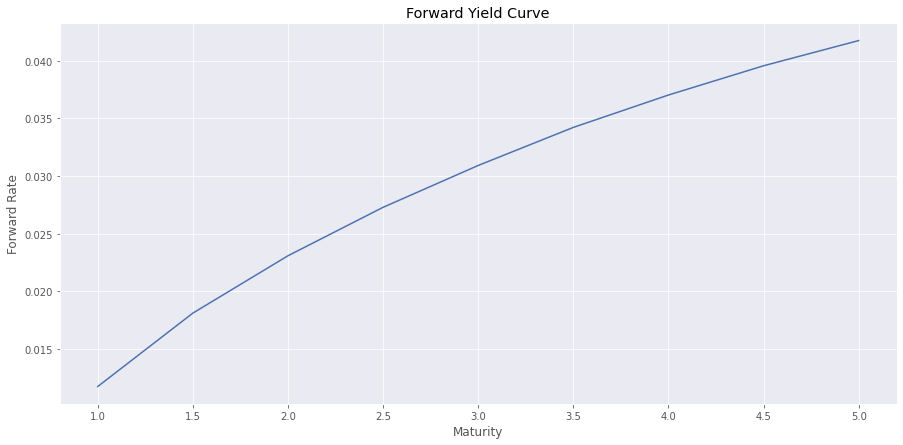

In [6]:
# Plots the forward yield curve
plt.plot(df['maturity'], df['forward_rate'])
plt.title("Forward Yield Curve")
plt.ylabel("Forward Rate")
plt.xlabel("Maturity")
plt.show()

# Question 5

## a) and b) Bond Price Using Spot and Forward Rates

The price of a bond depends on its par value, its coupon, its discount rate and its maturity. Mathematically, it is defined as follows:

\begin{align*}
    P & = \frac{M}{\left(1 + \frac{y}{m}\right)^N} + \sum^{N}_{i=1} \frac{C}{\left(1 + \frac{y}{m}\right)^i}
\end{align*}

When using forward rates, the formula is different, because we have to account for the product of all forward rate discount rates.

We can translate that into code by the following function:

In [7]:
def bond_price(C, M, y, m, forward):
    """
    Price a bond using the present value formula.

    Args:
        C (float): coupon
        M (float): principal amount
        y (float): list with according discount rates
        m (int): number of payment periods per year
        forward (bool): if True yields are interpreted as forward rates

    Returns:
        float: present value of the bond
    """
    # Number periods to maturity
    N = len(y)

    # Calculates price using spot rates
    if forward:
        P = M / np.prod([(1+y[j]/m) for j in range(N)])
        for i in range(N):
            P += C / np.prod([(1+y[j]/m) for j in range(i+1)])

    # Calculates price using forward rates
    else:
        P = M / ((1+y[N-1]/m)**N)
        for i in range(N):
            P += C / ((1+y[i]/m)**(i+1))
    
    return P

Now, assuming that the French government issued today (1st of January 2022) a 3-year government bond that pays semi-annually a 4% coupon (par value = 1,000€), we have the following:

In [8]:
# Defines parameters
maturity = 3     # Maturity period
M = 1000         # Par value
C = 0.04 * M/2   # Coupon
m = 2            # Number of payments per period

# Calculates bond price using spot rates
y = df[df['maturity'] <= maturity]['spot_rate']
P = bond_price(C, M, y, m, forward=False)
print(f"Bond price with spot rate: {P:.4f}")

# Calculates bond price using forward rates
y = df[df['maturity'] <= maturity]['forward_rate'].tolist()
y[0] = df['spot_rate'].iloc[0]
P = bond_price(C, M, y, m, forward=True)
print(f"Bond price with forward rate: {P:.4f}")

Bond price with spot rate: 1060.8447
Bond price with forward rate: 1060.8447


## c) Observations

We can see that, as expected, we obtain the same present value bond price when using forward and spot rates.

# Question 6

## Dirty Price of the Bond

The dirty bond pricing equation using a different spot rate per period becomes:

\begin{align*}
    P & = \frac{M}{\left(1 + \frac{s_N}{m}\right)^{N-1+w}} + \sum_{i=1}^{N-1} \frac{C}{\left(1 + \frac{s_i}{m}\right)^{i+w}}
\end{align*}

We know that coupon are paid semi-annualy, so we can calculate the dirty and clean prices of the bond 45 days after it was issued. Since we're dealing with a US bond, we use the 30/360 day count convention.

In [9]:
# Defines parameters
maturity = 3                                    # Maturity period
M = 1000                                        # Par value
C = 0.04 * M/2                                  # Coupon
m = 2                                           # Number of payments per period
w = (180 - 45)/180                              # days until next pay
y = df[df['maturity'] <= maturity]['spot_rate'] # spot yields

In [10]:
# Dirty price using spot rates
N = len(y)
dirty_price = M / ((1+y[N-1]/m)**(N-1+w))
for i in range(N):
    dirty_price += C / ((1+y[i]/m)**(i+1+w))

print(f"Dirty price: {dirty_price:.4f}")

Dirty price: 1062.5720


## Clean Price of the Bond

Here we will assume that the first coupon is paid at time 0, when the bond is issued. If that is not the case, and the first coupon is only paid after six months, then there would be no accrued interest (since the bond holder did not receive a coupon), and the clean price would be the same as the clean price.

In [11]:
accrued_interest = C*(45/180)
clean_price = dirty_price - accrued_interest
print(f"Clean price: {clean_price:.4f}")

Clean price: 1057.5720


# Question 7

We start by pricing the bond using spot rates.

In [12]:
# Defines parameters
maturity = 3       # Maturity period
M = 1000           # Par value
C = 0.04 * M/2     # Coupon
m = 2              # Number of payments per period
N = len(y)         # Number of periods until maturity

# Calculates bond price using spot rates
y = df[df['maturity'] <= maturity]['spot_rate']
P = bond_price(C, M, y, m, forward=False)
print(f"Bond price with spot rate: {P:.4f}")

Bond price with spot rate: 1060.8447


Now, we set up the equation that we want to solve.

\begin{align*}
    P & = \frac{M}{\left(1 + ytm\right)^{N}} + \sum_{i=1}^{N-1} \frac{C}{\left(1 + ytm\right)^{i}}
\end{align*}

or rewriting it:

\begin{align*}
    0 & = \frac{M}{\left(1 + ytm\right)^{N}} + \sum_{i=1}^{N-1} \frac{C}{\left(1 + ytm\right)^{i}} - P
\end{align*}


In [13]:
ytm = symbols('ytm')
eq = M / ((1+ytm)**(N))
eq += sum([C/((1+ytm)**(i+1)) for i in range(N)]) - P
eq

-1060.84467365362 + 20.0/(ytm + 1) + 20.0/(ytm + 1)**2 + 20.0/(ytm + 1)**3 + 20.0/(ytm + 1)**4 + 20.0/(ytm + 1)**5 + 1020.0/(ytm + 1)**6

Now, let's solve the equation numerically.

In [14]:
sol = solve(eq, ytm)
sol

[-1.99029825542637,
 0.00951870907064098,
 -1.49519576541833 - 0.857597036341344*I,
 -1.49519576541833 + 0.857597036341344*I,
 -0.504988010719412 - 0.857707264103895*I,
 -0.504988010719412 + 0.857707264103895*I]

We see that the only real and positive solution gives us:

In [15]:
ytm = float(sol[1])
print(f"Yield-to-maturity: {ytm:.4f}")

Yield-to-maturity: 0.0095


This means that the total anticipated return on the bond if we hold it until maturity and reinvest the coupons is around 0.0095.

# Question 8

a) Calculate DV01 for a one basis point decrease in YTM. Interpret.

In [16]:
# Decrease of 1 basis point to YTM
new_ytm = ytm - 0.0001

# Calculate price with new YTM
new_P = M / ((1+new_ytm)**(N))
new_P += sum([C/((1+new_ytm)**(i+1)) for i in range(N)])

DV01 = - (new_P - P)/(10000*(new_ytm - ytm))
print(f"Dollar value of a 1 basis point decrease in YTM: {DV01:.4f}")

Dollar value of a 1 basis point decrease in YTM: 0.6016


This means that for every 1 basis point decrease in YTM, the value of the bond increases by €0.6016. This estimate, however, considers only a linear relationship between YTM and price, and, thus, is only good for small variations in YTM.

b) Calculate duration and convexity for a 2% increase and decrease in YTM. Interpret.

In [17]:
ytm_delta = 0.02

# Price for 2% decrease in YTM
new_ytm = ytm - ytm_delta
decrease_P = M / ((1+new_ytm)**(N))
decrease_P += sum([C/((1+new_ytm)**(i+1)) for i in range(N)])

# Price for 2% increase in YTM
new_ytm = ytm + ytm_delta
increase_P = M / ((1+new_ytm)**(N))
increase_P += sum([C/((1+new_ytm)**(i+1)) for i in range(N)])

# Calculate duration
D = (decrease_P - increase_P)/(2*P*ytm_delta)

# Calculate convexity
Cx = (decrease_P + increase_P - 2*P)/(P*(ytm_delta**2))

print(f"Duration for a 2% variation in YTM: {D:.4f}%")
print(f"Convexity for a 2% variation in YTM: {Cx:.4f}")

Duration for a 2% variation in YTM: 5.6897%
Convexity for a 2% variation in YTM: 38.7723


The duration tells us that for a 2% change in YTM, the bond price will vary inversely by 6.0439%. This is a good estimate for small variations in YTM. The convexity, on the hand, does not tell us much by itself. However, it can be compared to other convexity values to evaluate the effects of big changes to YTM, because it accounts for non-linear effects.

c) Calculate the change in bond price for a 2% increase and decrease in YTM using the duration/convexity approach. Interpret.

In [18]:
deltaP_neg = (-D)*(-ytm_delta)*M + 0.5*Cx*(-ytm_delta**2)*M
deltaP_pos = (-D)*(ytm_delta)*M + 0.5*Cx*(ytm_delta**2)*M

print(f"Variation in price for a 2% decrease in YTM: {deltaP_neg:.4f}%")
print(f"Variation in price for a 2% increase in YTM: {deltaP_pos:.4f}%")

Variation in price for a 2% decrease in YTM: 106.0397%
Variation in price for a 2% increase in YTM: -106.0397%


This indicates that an 2% decrease (increase) in YTM is associated to a 10.0261% increase (decrease) in bond price. This estimate is also more well suited for large changes in interest rates, since it considers both duration (small variations) and convexity (large variations).

# Question 9

## a) Create a hedging strategy with the first bond using the DV01 measure

The objective of a hedging strategy is to produce a combined position (the original position + a hedging position), so that the change in interest rate does not change the value of an investor's portfolio of fixed income securities. This is expressed as follows:

\begin{align*}
    \text{Dollar price change of position} & = \text{Dollar price change of hedging instrument}
\end{align*}

To hedge a position using the DV01 measure, the following equation is used:

\begin{align*}
    HR & = \frac{DV01_{op}}{DV01_{HI}}
\end{align*}

Assuming that the goal is to purchase $15M of the bond calculated in question 5:

In [20]:
# Sets the value of the operation and the par value
V_op = 15E6
M = 1000

# Sets the DV01 of the bonds
DV01_op = DV01   # DV01 of the bond calculated in question 5
DV01_hi = 0.6321 # Random DV01 of the hedging instrument

# Calculates the hedge ratio
hr = DV01_op / DV01_hi
print(f"Interpretation: For every $1 par value of the bond, short ${M*hr:.4f} of par (= ${M}*{hr:.4f}) of the hedging instrument bond.")

# Calculates the face value
fv = V_op * hr
print(f"Interpretation: In order to hedge this ${V_op} option position, the investor must short ${fv:.4f} in face value of the bond.")

Interpretation: For every $1 par value of the bond, short $951.8130 of par (= $1000*0.9518) of the hedging instrument bond.
Interpretation: In order to hedge this $15000000.0 option position, the investor must short $14277194.6883 in face value of the bond.


## b) Create a hedging strategy with the second bond using the duration measure

To hedge a position using the "duration" measure, we need to know the "duration" of our current bond position and the "duration" of the hedging instrument.

Using these two parameters, we can determine the $ value of the hedging instrument that we need to sell or buy in order to have a perfect hedge. This value is estimated by the following equation:

\begin{align*}
    V_{HI} & = - \frac{D_{OP} \ * \ V_{OP}}{D_{HI}}
\end{align*}

Assuming that the goal is to purchase $15M of the bond calculated in question 5:

In [23]:
# Sets the value of the operation and the par value
V_op = 15E6
M = 1000

# Sets the duration of the bonds
duration_op = D    # Duration of the bond calculated in question 5
duration_hi = 6    # Random duration of the hedging instrument

# Calculates the hedge ratio
hr = duration_op / duration_hi
print(f"Interpretation: For every $1 par value of the bond, short ${M*hr:.4f} of par (= ${M}*{hr:.4f}) of the hedging instrument bond.")

# Calculates the face value
fv = V_op * hr
print(f"Interpretation: The bank would have to short ${fv:.4f} of this bond to cover its position.")

Interpretation: For every $1 par value of the bond, short $94.8285 of par (= $100*0.9483) of the hedging instrument bond.
Interpretation: The bank would have to short $14224275.9967 of this bond to cover its position.


## c) Create a hedging strategy with the two bonds using the duration/convexity approach

This is a process in which both measures must be hedged simultaneously. To do this, the investor must use two hedging instruments (two bonds) - one per measure. To create a perfect hedge, an investor should know the ”duration” and the “convexity” of each of the hedging instruments. The following two equations must be satisfied for a position to be hedged.

\begin{cases}
    V_{OP} * D_{OP} - V_{HI1} * D_{HI1} - V_{HI2} * D_{HI2} & = 0 \\
    V_{OP} * {Cx}_{OP} - V_{HI1} * {Cx}_{HI1} - V_{HI2} * {Cx}_{HI2} & = 0 
\end{cases}


In [29]:
# Sets the value of the operation and the par value
V_op = 15E6
M = 1000

# Sets the duration of the bonds
duration_op = D     # Duration of the bond calculated in question 5
duration_hi1 = 6    # Random duration of the hedging instrument 1
duration_hi2 = 7    # Random duration of the hedging instrument 2

# Sets the convexity of the bonds
convexity_op = Cx     # Convexity of the bond calculated in question 5
convexity_hi1 = 40    # Random convexity of the hedging instrument 1
convexity_hi2 = 45    # Random convexity of the hedging instrument 2

# Obtains V_HI1 and V_HI2
V_hi1, V_hi2 = symbols('V_HI1 V_HI2')
eq1 = Eq(V_op * duration_op - V_hi1 * duration_hi1 - V_hi2 * duration_hi2, 0)
eq2 = Eq(V_op * convexity_op - V_hi1 * convexity_hi1 - V_hi2 * convexity_hi2, 0)
V_hi1, V_hi2 = tuple(solve((eq1, eq2), (V_hi1, V_hi2)).values())

print(f"Therefore, for the bank to hedge its position, it must take a long position of ${V_hi1:.4f} in the first bond and a short position of ${V_hi2:.4f} in the second bond. In other words, by combining these positions, there is no duration or convexity exposure, and thus the bank is hedged against small and big changes in interest rates.")

Therefore, for the bank to hedge its position, it must take a long position of $23053797.7418 in the first bond and a short position of $-7568161.4958 in the second bond. In other words, by combining these positions, there is no duration or convexity exposure, and thus the bank is hedged against small and big changes in interest rates.
